<a href="https://colab.research.google.com/github/Rosari03/Metodos-Numericos/blob/main/Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $Nodos$   $de$  $Chebyshev$

Uno de los problemas clásicos en interpolación polinómica es el uso de nodos equidistantes. Aunque puede parecer una elección natural, este tipo de distribución puede llevar a errores significativos cuando se incrementa el número de puntos, especialmente cerca de los extremos del intervalo. Este fenómeno, conocido como el fenómeno de Runge, provoca que el polinomio interpolante oscile fuertemente y se aleje de la función original.

$$f(x)= \frac{(1)}{(1+25x^2)}$$

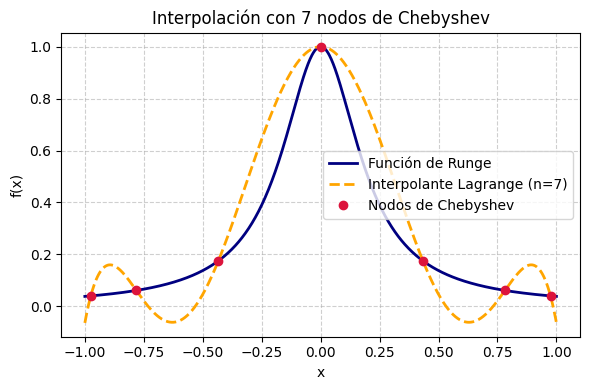

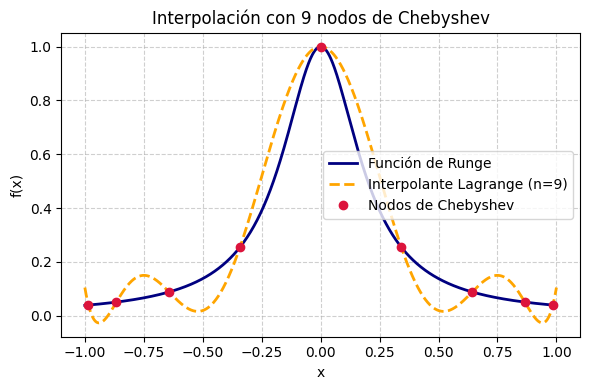

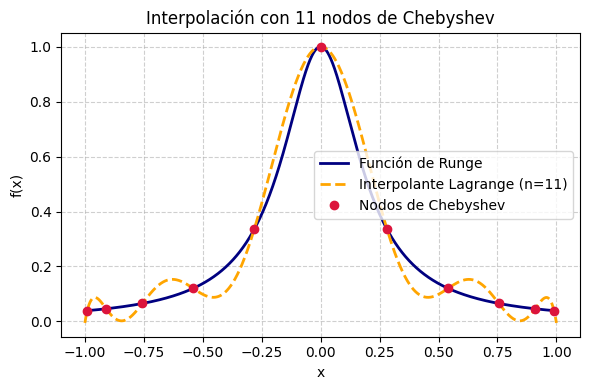

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Función de Runge
def runge_function(x):
    return 1 / (1 + 25 * x**2)

# Nodos de Chebyshev en [a, b]
def chebyshev_nodes(n, a, b):
    k = np.arange(n)
    x_k = np.cos((2 * k + 1) * np.pi / (2 * n))
    return 0.5 * (a + b) + 0.5 * (b - a) * x_k

# Interpolación de Lagrange
def lagrange_interpolant(x_nodes, y_nodes, x_eval):
    n = len(x_nodes)
    L = np.zeros_like(x_eval)

    for j in range(n):
        lj = np.ones_like(x_eval)
        for m in range(n):
            if m != j:
                lj *= (x_eval - x_nodes[m]) / (x_nodes[j] - x_nodes[m])
        L += y_nodes[j] * lj
    return L

# Parámetros
a, b = -1, 1
x_plot = np.linspace(a, b, 1000)
y_true = runge_function(x_plot)

# Probar para diferentes números de nodos
for n in [7, 9, 11]:
    x_nodes = chebyshev_nodes(n, a, b)
    y_nodes = runge_function(x_nodes)
    y_interp = lagrange_interpolant(x_nodes, y_nodes, x_plot)

    plt.figure(figsize=(6, 4))
    plt.plot(x_plot, y_true, color='navy', label='Función de Runge', linewidth=2)
    plt.plot(x_plot, y_interp, color='orange', linestyle='--', label=f'Interpolante Lagrange (n={n})', linewidth=2)
    plt.plot(x_nodes, y_nodes, 'o', color='crimson', label='Nodos de Chebyshev', markersize=6)
    plt.title(f'Interpolación con {n} nodos de Chebyshev')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()

